In [ ]:
# Avaliation of the parameters

In [1]:
%matplotlib inline
import numpy as np
import corner
import itertools
import matplotlib.pyplot as plt
from func import *
from scipy import optimize as op

In [2]:
#First data
#data = astro.io.ascii.read('Inputs/data/rvs_0001.txt', names=['time','vel','err'])
data = np.loadtxt('Inputs/data/rvs_0001.txt')
obser = [data[:,0],data[:,1],data[:,2]]

## zero planets - data 0001

The values of C and J, and evidence [-0.72361584  2.0985291 ] -487.82576


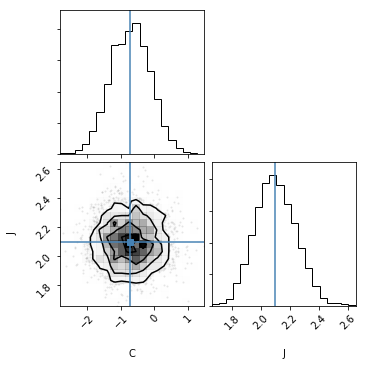

In [6]:
n_mixture = 2
samples = np.genfromtxt('chains/0pd0001_equal_weights.txt')
z=!sed -n '38p' chains/0pd0001.resume
z=np.float(z[0])
mus0p001 = np.mean(samples[:, 2:], axis=0)
sigs = np.std(samples[:, 2:], axis=0)
fig = corner.corner(samples[:, 2:], ranges=[[0, 1]*(3*n_mixture-1)],labels=['C','J'],truths=mus0p001)
print('The values of C and J, and evidence', mus0p001,z)

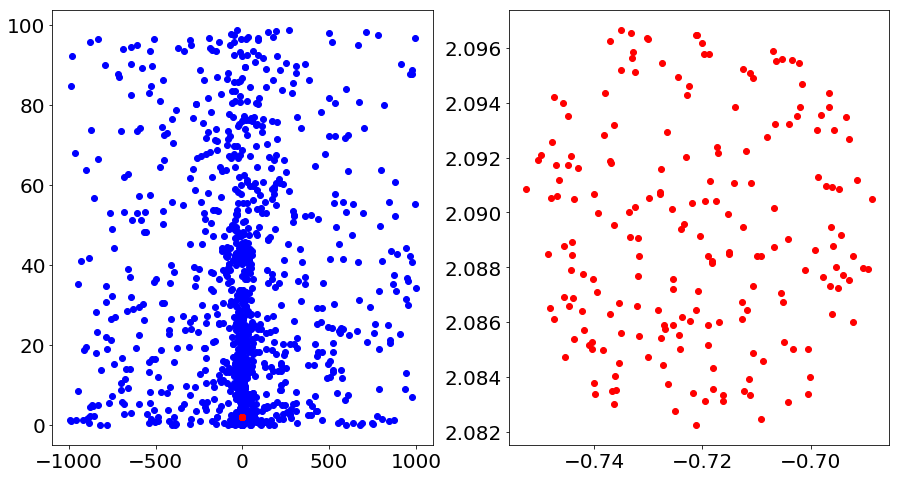

In [7]:
samples_runtime = np.genfromtxt('chains/0pd0001_phys_live.txt')
samples_dead = np.genfromtxt('chains/0pd0001_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,1],samples_dead[:,2], 'bo')
plt.plot(samples_runtime[:,0],samples_runtime[:,1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,0],samples_runtime[:,1], 'ro');

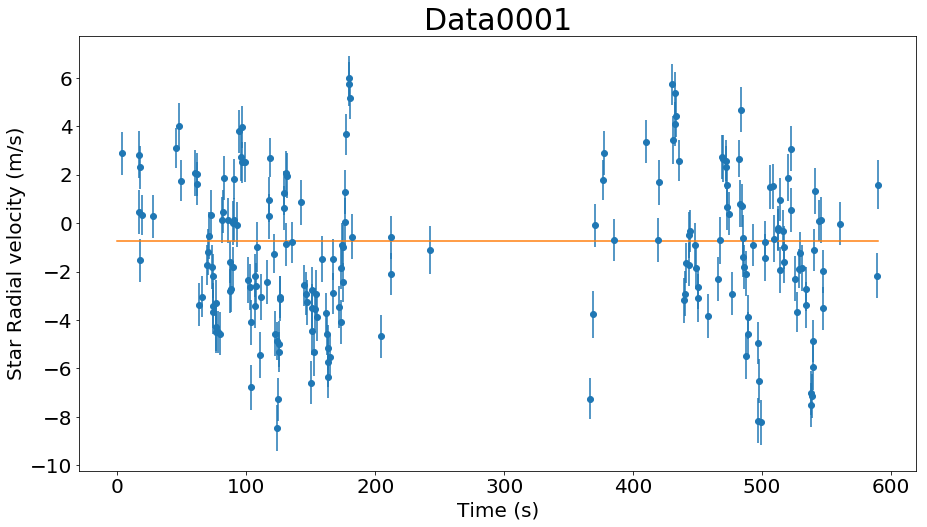

In [8]:
x = data[:,0]
xm = np.arange(0,data[-1,0],data[-1,0]/1000)
y = data[:,1]
y0 = model(mus0p001,xm,0)
yerr = data[:,2]
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,8))
#plt.xlabel('teste')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Star Radial velocity (m/s)', fontsize=20)
plt.errorbar(x, y, yerr=yerr,fmt='o')
plt.plot(xm,y0)
plt.tick_params(labelsize=20)
plt.title("Data0001",fontsize=30)
#plt.plot(x,y,'o')


plt.show()

## One planet - data 0001

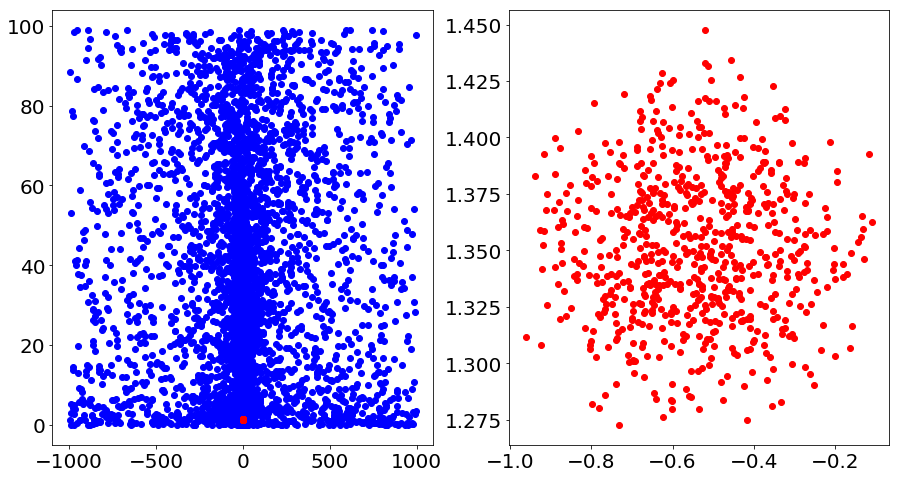

In [3]:
n_plan = 1
samples_runtime = np.genfromtxt('chains/1pd0001_phys_live.txt')
samples_dead = np.genfromtxt('chains/1pd0001_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,5*n_plan+1],samples_dead[:,5*n_plan+2], 'bo')
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro');

[ 42.07985123   2.4868875    0.23880738   2.22753949   3.35168781
  -0.5618149    1.39096782]


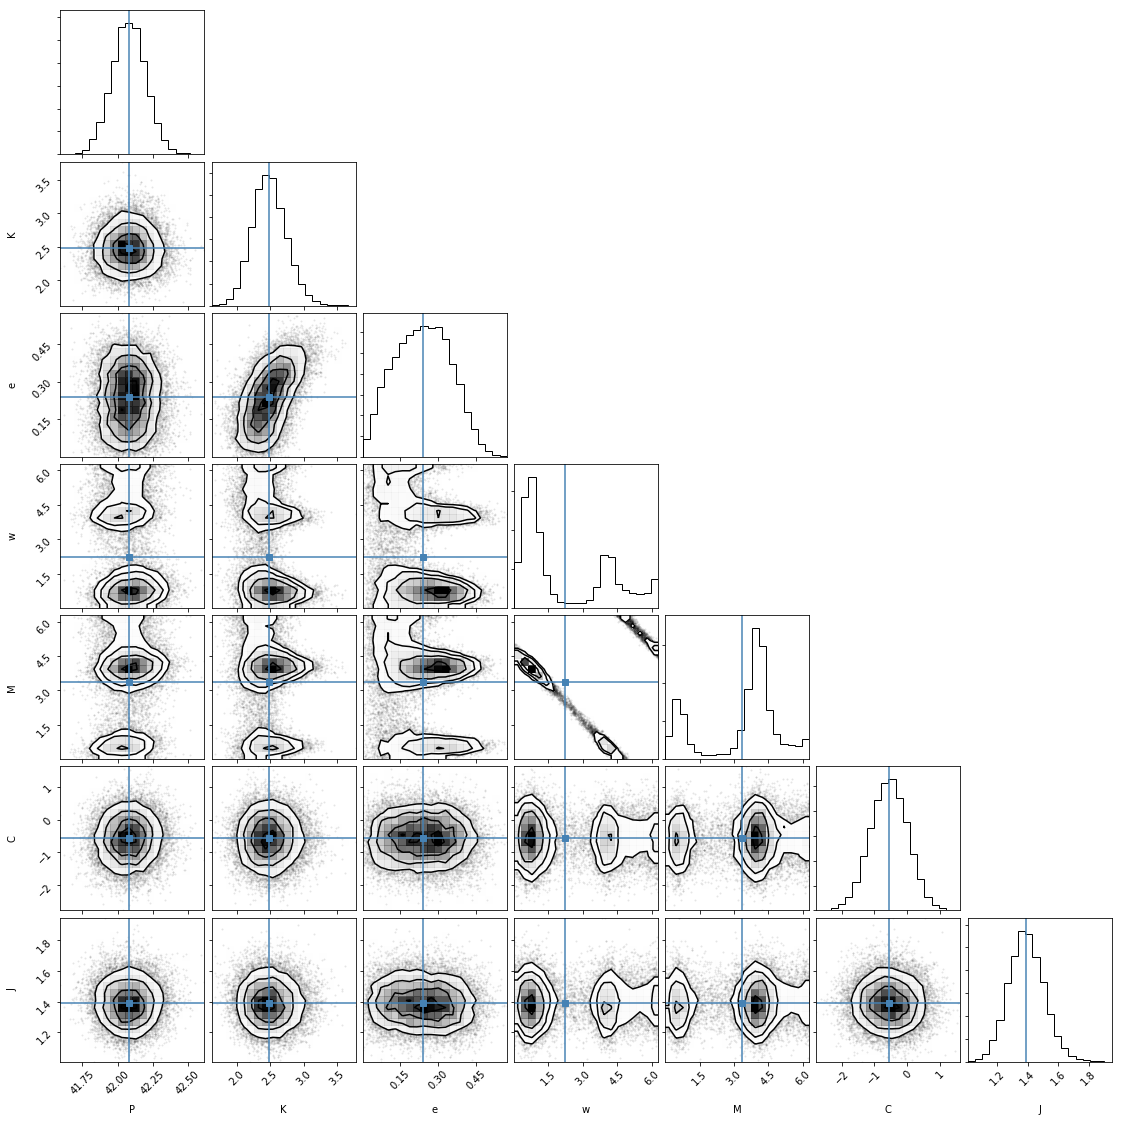

In [4]:
n_mixture = 7
samples = np.genfromtxt('chains/1pd0001_equal_weights.txt')
#z=!sed -n '38p' chains/0pd0001.resume
#z=np.float(z[0])
mus1p001 = np.mean(samples[:, 2:], axis=0)
#sigs = np.std(samples[:, 2:], axis=0)
fig = corner.corner(samples[:, 2:], ranges=[[0, 1]*(3*n_mixture-1)],labels=['P','K','e','w','M','C','J'],truths=mus1p001)
print(mus1p001)
#print('The values of C and J, and evidence', mus0p001,z)

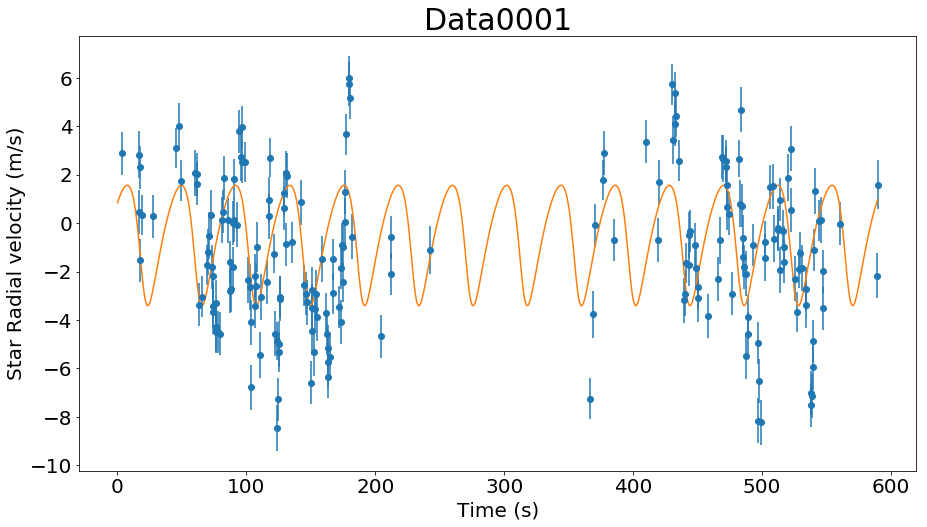

In [5]:
x = data[:,0]
xm = np.arange(0,data[-1,0],data[-1,0]/1000)
y = data[:,1]
y0 = model(mus1p001,xm,1)
yerr = data[:,2]
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,8))
#plt.xlabel('teste')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Star Radial velocity (m/s)', fontsize=20)
plt.errorbar(x, y, yerr=yerr,fmt='o')
plt.plot(xm,y0)
plt.tick_params(labelsize=20)
plt.title("Data0001",fontsize=30)
#plt.plot(x,y,'o')

## two planets - data 0001

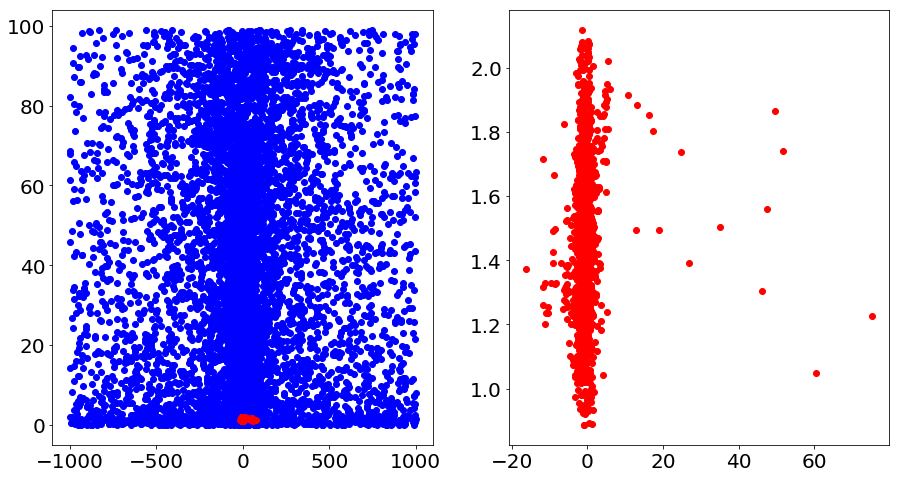

In [5]:
n_plan = 2
samples_runtime = np.genfromtxt('chains/2pd0001_phys_live.txt')
samples_dead = np.genfromtxt('chains/2pd0001_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,5*n_plan+1],samples_dead[:,5*n_plan+2], 'bo')
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro');

In [4]:
!cat chains

0pd0001.resume		   1pd0001.stats	      2pd0001.txt
0pd0001.stats		   1pd0001.txt		      2pd0001_dead.txt
0pd0001.txt		   1pd0001_dead.txt	      2pd0001_equal_weights.txt
0pd0001_dead.txt	   1pd0001_equal_weights.txt  2pd0001_phys_live.txt
0pd0001_equal_weights.txt  1pd0001_phys_live.txt      clusters
0pd0001_phys_live.txt	   2pd0001.resume
1pd0001.resume		   2pd0001.stats
